# Algoritmo de Shor

### Importamos las herramientas necesarias:

In [1]:
import qiskit
from qiskit import *
from qiskit.visualization import plot_histogram
import math
from math import pi
import matplotlib
%matplotlib inline

### Definimos la transformada cuántica de Fourier

Para esta transformada tuve que cambiar la convención que veníamos manejando, por favor adecúen el notebook anterior para ser consistentes. Este es un problema recurrente en la literatura, ya que se maneja de manera indistinta la transformada cuántica de Fourirer y su inversa (el algoritmo de estimación de fases).

In [2]:
def Fourier(q,circuit):

    for k in range(q):
        j = q - k
        circuit.h(j-1)
        
        for i in reversed(range(j-1)):
            circuit.cu1(2*pi/2**(j-i),i, j-1)

    for i in range(q//2):
        circuit.swap(i, q-i-1)

### Subrutina cuántica del algoritmo de Shor

Recordemos que solo un paso del algoritmo de Shor se implementa de manera cuántica: encontrar el orden de a modulo N.

La subrutina requiere la implementación del operador Uf, con f(x) = a^x (Mod N), la cual es complicada de implementar en qiskit por las limitaciones en el número de controles de las compuertas controladas. En este ejemplo utilizaremos los valores vistos en clase: N = 15, a = 4 (recordemos que N y a deben ser primos relativos). En este caso el orden de 4 módulo 15 es 2.

In [3]:
N = 15
a = 4

# El operador Uf se controlará con los primeros n qubits y almacenará el valor de la función en los últimos m qubits.
n = int(math.log(N*N,2))+1
m = int(math.log(N-1,2))+1

# Definimos el circuito
qc = QuantumCircuit(n+m,n)

In [4]:
# Creamos la superposición de todos los enteros posibles con n bits

for i in range(0,n):
    qc.h(i)
    
qc.barrier(range(0,n+m))

In [5]:
# Implementación del operador Uf

qc.x(0)
qc.cx(0,n)
qc.x(0)
qc.cx(0,n+2)

qc.barrier(range(0,n+m))

In [6]:
# Aplicación de la transformada cuántica de Fourier a los primeros n qubits

Fourier(n,qc)

qc.barrier(range(0,n+m))

In [7]:
# Medición de los primeros n qubits

qc.measure(range(0,n),range(0,n))

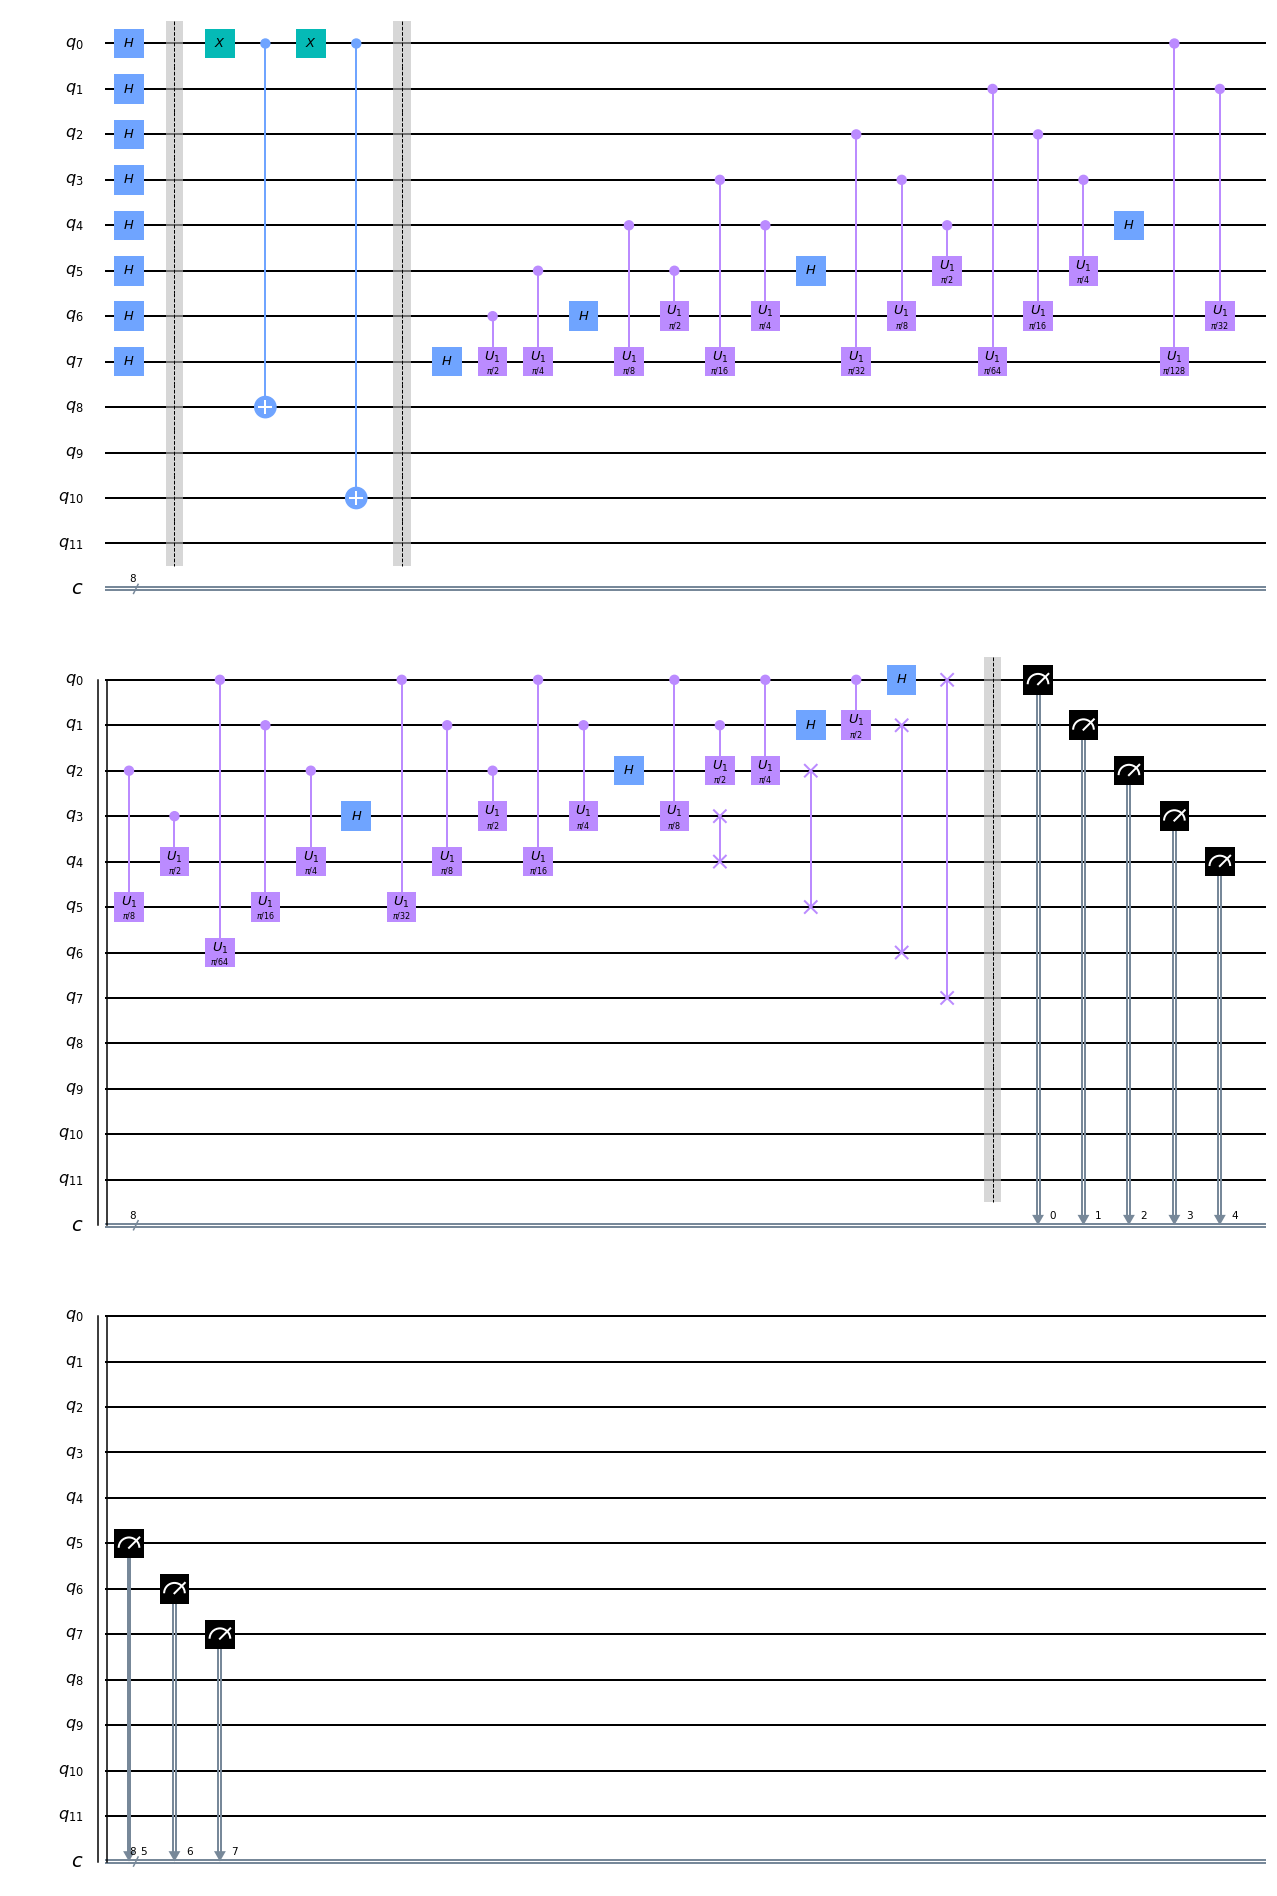

In [8]:
qc.draw(output = 'mpl')

### Visualización de las mediciones

In [68]:
qasm = Aer.get_backend('qasm_simulator')

In [69]:
job = execute(qc, qasm, shots=1000)
result = job.result()
counts = result.get_counts(qc)

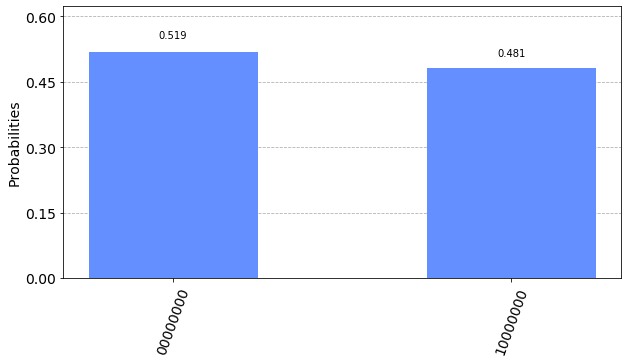

In [70]:
plot_histogram(counts,figsize=(10,5))

### Consideraciones

Noten que la probabilidad de medir el entero 0 es la misma que de medir el entero 128. Sin embargo, obtener como resultado de la medición el entero 0, no nos es útil para calcular el orden de 4 módulo 15. De hecho, puede darse el caso (dependiendo del valor de a), que nínguno de los resultados probables sea útil para calcular el orden. Si con el valor medido no se encuentra el valor del orden, el procedimiento a seguir es elegir nuevamente un valor a y repetir el algoritmo.

En la práctica, es común tener que repetir todo el algortimo de Shor varias veces antes de encontrar un factor del número que deseamos descomponer. A pesar de esto, y debido a la diferencia de complejidad, la subrutina cuántica para calcular el orden sigue ofreciendo una ventaja significativa sobre la clásica.